In [5]:
#based on  https://learn.qiskit.org/course/ch-applications/quantum-edge-detection
from qiskit import *
from qiskit.compiler import transpile, assemble
from qiskit.providers.aer import AerSimulator
from qiskit.providers.fake_provider import FakeLima
backend = AerSimulator.from_backend(FakeLima())
# ibmq_santiago

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('bmh')

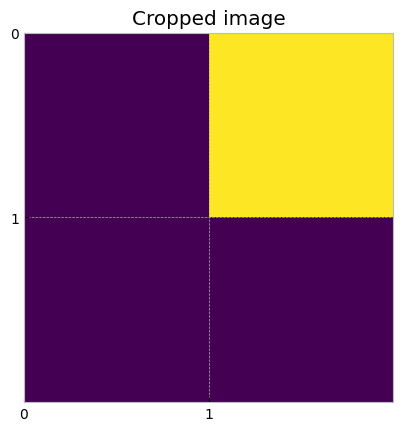

In [7]:
# A 2x2 binary image represented as a numpy array
image_small = np.array([ [0, 1],
                  [0, 0] ])

# Function for plotting the image using matplotlib
def plot_image(img, title: str):
    plt.title(title)
    plt.xticks(range(img.shape[0]))
    plt.yticks(range(img.shape[1]))
    plt.imshow(img, extent=[0, img.shape[0], img.shape[1], 0], cmap='viridis')
    plt.show()
    
# Plotting the image_small using matplotlib
plot_image(image_small, 'Cropped image')

In [8]:
# Initialize the number of qubits
data_qb = 2
anc_qb = 1
total_qb = data_qb + anc_qb

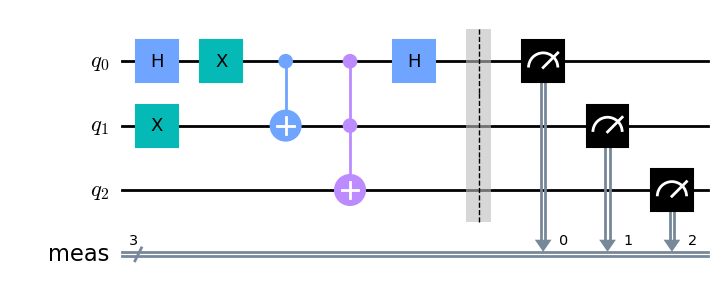

In [10]:
# Create the circuit for horizontal scan, only state |01> is non-zero?
qc_small_h = QuantumCircuit(total_qb)
qc_small_h.x(1) # data
qc_small_h.h(0) # ancilla 

# Decrement gate - START
qc_small_h.x(0)
qc_small_h.cx(0, 1)
qc_small_h.ccx(0, 1, 2)
# Decrement gate - END

qc_small_h.h(0)
qc_small_h.measure_all()
display(qc_small_h.draw('mpl'))


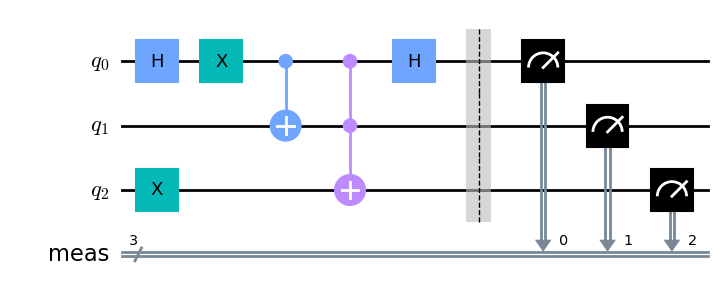

In [11]:
# Create the circuit for vertical scan
qc_small_v = QuantumCircuit(total_qb)
qc_small_v.x(2)  #data
qc_small_v.h(0) # ancilla 

# Decrement gate - START
qc_small_v.x(0)
qc_small_v.cx(0, 1)
qc_small_v.ccx(0, 1, 2)
# Decrement gate - END

qc_small_v.h(0)
qc_small_v.measure_all()
display(qc_small_v.draw('mpl'))

# Combine both circuits into a single list
circ_list = [qc_small_h, qc_small_v]

In [12]:
# Transpile the circuits for optimized execution on the backend
qc_small_h_t = transpile(qc_small_h, backend=backend, optimization_level=3)
qc_small_v_t = transpile(qc_small_v, backend=backend, optimization_level=3)
# print(qc_small_v_t)

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


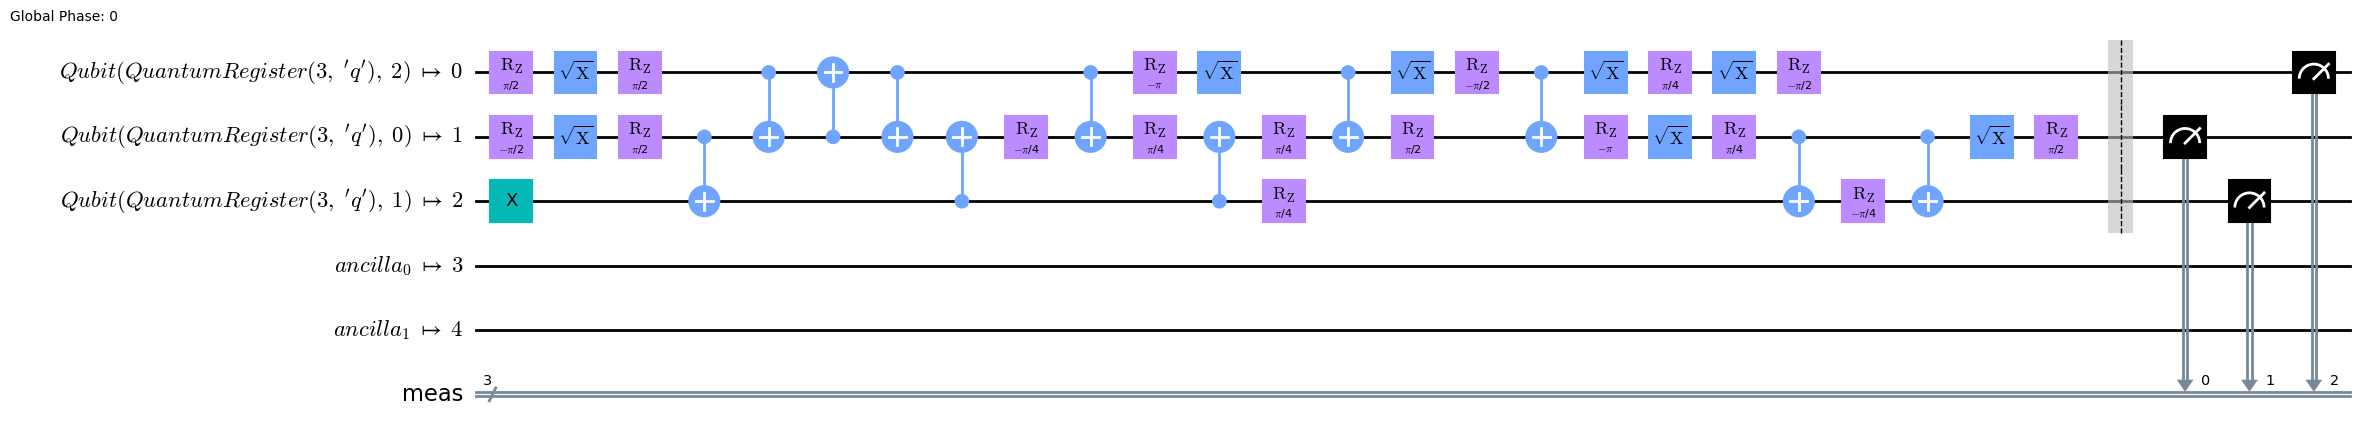

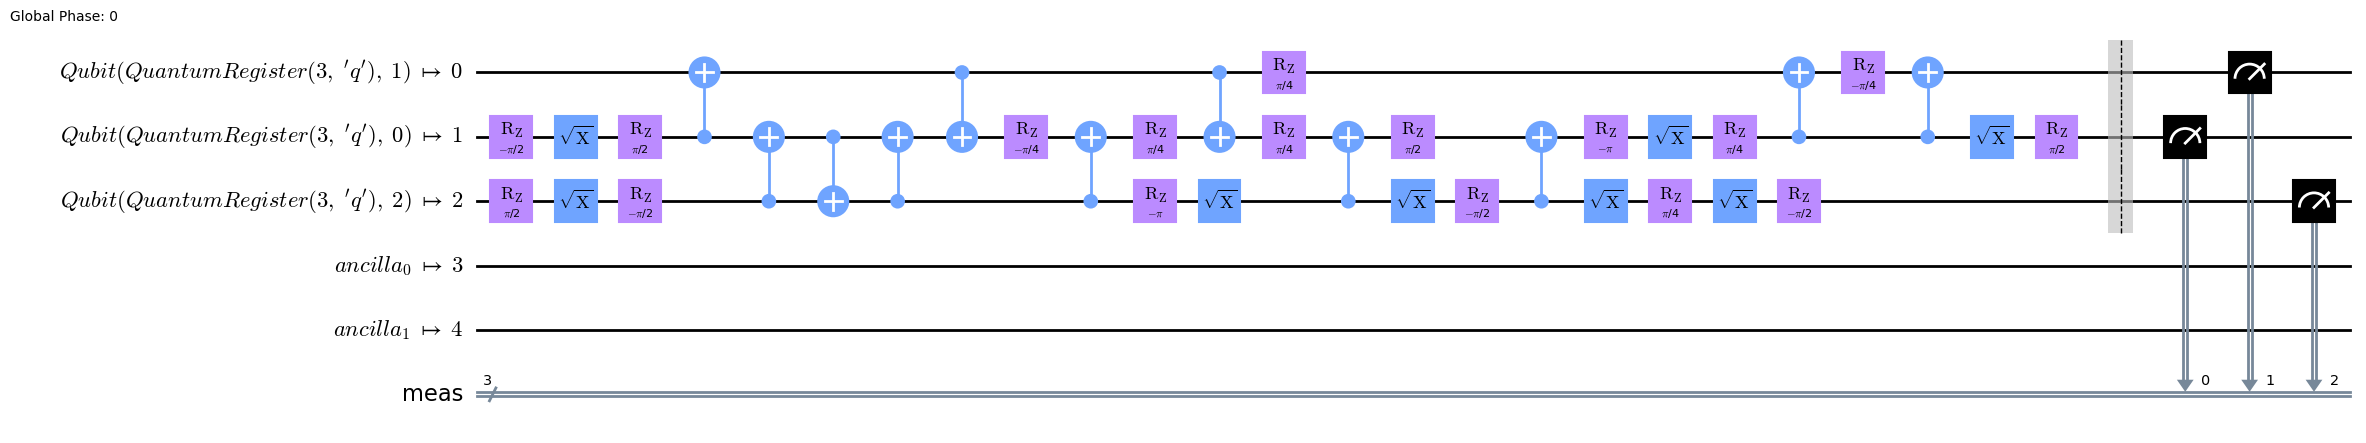

In [14]:
# Combining both circuits into a list
circ_list_t = [qc_small_h_t, qc_small_v_t]

# Drawing the transpiled circuit
display(circ_list_t[0].draw('mpl', fold=-1))
display(circ_list_t[1].draw('mpl', fold=-1))

In [15]:
from qiskit.tools.monitor import job_monitor

# Executing the circuits on the backend
job = execute(circ_list_t, backend=backend, shots=8192)
job_monitor(job)

Job Status: job has successfully run


Counts for Horizontal scan:


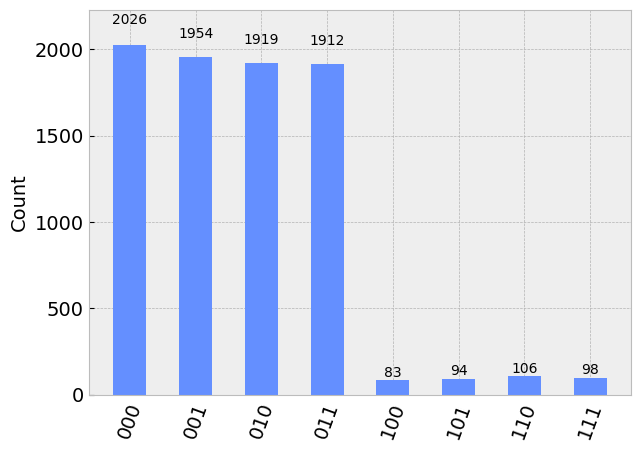



Counts for Vertical scan:


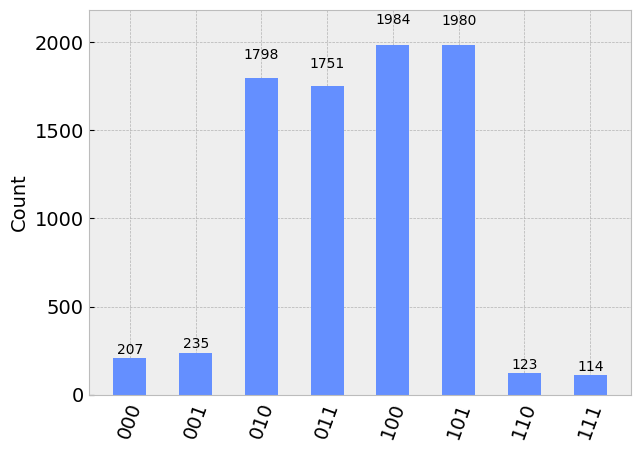

In [16]:
from qiskit.visualization import plot_histogram

# Getting the resultant probability distribution after measurement
result = job.result()
counts_h = result.get_counts(qc_small_h)
counts_v = result.get_counts(qc_small_v)

print('Counts for Horizontal scan:')
display(plot_histogram(counts_h))

print('\n\nCounts for Vertical scan:')
display(plot_histogram(counts_v))

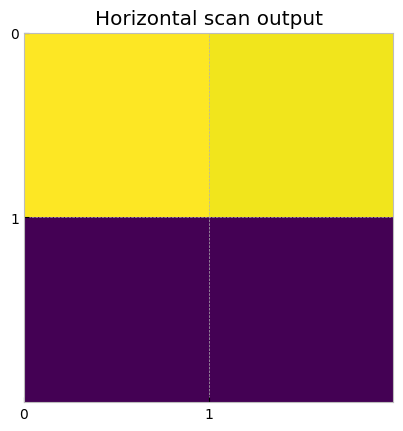

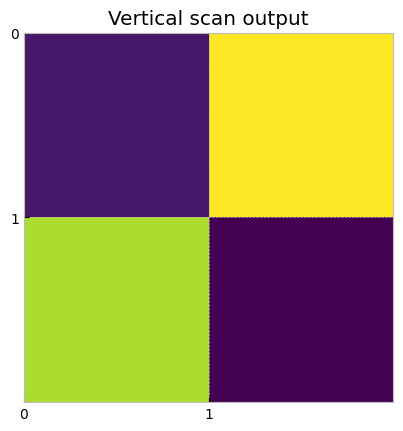

In [17]:
# Extracting counts for odd-numbered states
edge_scan_small_h = np.array([counts_h[f'{2*i+1:03b}'] for i in range(2**data_qb)]).reshape(2, 2)
edge_scan_small_v = np.array([counts_v[f'{2*i+1:03b}'] for i in range(2**data_qb)]).reshape(2, 2).T

plot_image(edge_scan_small_h, 'Horizontal scan output')
plot_image(edge_scan_small_v, 'Vertical scan output')

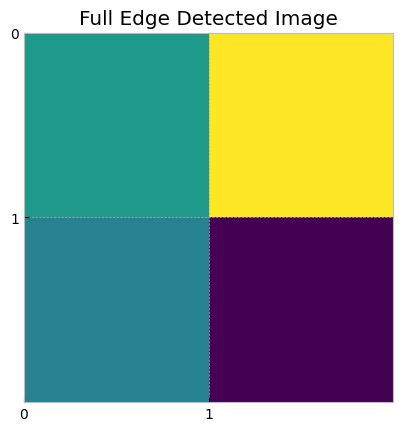

In [18]:
edge_detected_image_small = edge_scan_small_h + edge_scan_small_v

# Plotting the original and edge-detected images
plot_image(edge_detected_image_small, 'Full Edge Detected Image')